In [1]:
# Cobb-Douglas regression and Penn World Table

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

pwt = pd.read_excel('pwt100.xls', sheet_name='Data')

In [2]:
pwt.countrycode.unique()

array(['ABW', 'AGO', 'AIA', 'ALB', 'ARE', 'ARG', 'ARM', 'ATG', 'AUS',
       'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR',
       'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN',
       'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR',
       'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUW', 'CYM', 'CYP',
       'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY',
       'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'GAB', 'GBR', 'GEO',
       'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GTM', 'GUY',
       'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN',
       'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN',
       'KGZ', 'KHM', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LCA',
       'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MDA', 'MDG',
       'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ',
       'MRT', 'MSR', 'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC',
       'NLD', 'NOR',

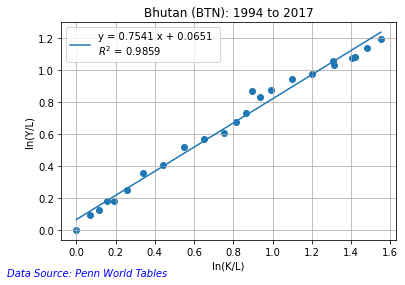

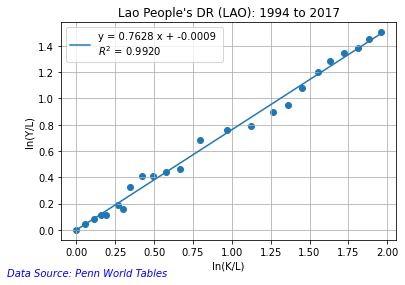

In [5]:
begin_date = 1994
end_date = 2017
ccodes = pwt.countrycode.unique().tolist()
ccodes =['BTN','LAO']
for ccode in ccodes:
    first = pwt.loc[pwt["countrycode"] == ccode]
    second = first[ (first['year'] >= begin_date) & (first['year'] <= end_date) ]
    third = {}
    third['Y'] = second['cgdpe'] / second['cgdpe'].iloc[0]
    third['K'] = second['cn'] / second['cn'].iloc[0]
    third['L'] = second['emp'] / second['emp'].iloc[0]
    third['YL'] = third['Y'] /third['L']
    third['KL'] = third['K'] /third['L']
    third['lnYL'] = np.log(third['YL'])
    third['lnKL'] = np.log(third['KL'])
    third = pd.DataFrame(third)
    third = third.dropna()
    if(len(third)>0):
        f = plt.figure()
        ax = f.add_subplot(111)
        ax.scatter(third['lnKL'], third['lnYL'], label='')
        m, b, r_value, p_value, std_err = scipy.stats.linregress(third['lnKL'], third['lnYL'])
        ax.plot(third['lnKL'], m*third['lnKL'] + b, label='y = %.4f x + %.4f \n$R^2$ = %.4f' %(m, b, r_value**2))
        ax.legend()
        ax.set_xlabel('ln(K/L)')
        ax.set_ylabel('ln(Y/L)')
        plt.grid()
        ax.set_title(second['country'].iloc[0] + ' (' + ccode + '): '+ str(begin_date) + ' to '+ str(end_date))
        ax.text(0.0, 0.0, "Data Source: Penn World Tables", color='blue', fontstyle='italic', transform=f.transFigure)
        plt.savefig('Cobb-Douglas-' + ccode + '.png')
        plt.show()